In [1]:
import attrs
import numpy as np
from matplotlib import pyplot as plt

from hetero.algo import BetaOptimizer, MCPImpl
from hetero.config import DTYPE, AlgoConfig, DataGenConfig, GroupingConfig
from hetero.datagen import generate_data_from_config
from hetero.policies import AlternativePolicy
from hetero.tasks import (
    beta_estimate_from,
    beta_estimate_from_e2e_learning,
    beta_estimate_from_nongrouped,
    compute_UV_truths,
    compute_V_estimate,
)

=====================================================================================================

In [2]:
# Setting following two coeffs to same values for both groups to simulate the homogeneous case.

group_reward_coeff = np.array(
    [
        [2.68, -2.68],
        [2.68, -2.68],
    ],
    dtype=DTYPE,
)

action_reward_coeff = [2.89, 2.89]

data_config_init = dict(
    num_time_steps=30,
    group_reward_coeff_override=group_reward_coeff,
    action_reward_coeff=action_reward_coeff,
    basis_expansion_method="NONE",
    add_intercept_column=True,
)

data_config = DataGenConfig(num_trajectories=100, **data_config_init)


# Aglorithm Run

In [3]:
algo_config_init = dict(
    discount=0.6,
    max_num_iters=10,
    nu_coeff=8e-6,
    delta_coeff=8e-6,
    gam=2.0,
)

data = generate_data_from_config(data_config)

pi_eval = AlternativePolicy(data.num_actions())

beta_nongrouped = beta_estimate_from_nongrouped(
    data, pi_eval, algo_config_init["discount"]
)

lam_to_beta = {}


new_labels.length=6000 matches number of records


In [4]:
lam_list = [3.6, 1.6, 0.6]
rho_list = [100.0, 2.0, 6.0]

lam_to_rho = {k:v for k, v in zip(lam_list, rho_list)}

for lam, rho in zip(lam_list, rho_list):
    print(f"+++++ lam = {lam}, rho = {rho} +++++")
    algo_config = AlgoConfig(lam=lam, rho=rho, **algo_config_init)
    impl = MCPImpl(data.N(), algo_config)
    beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
    lam_to_beta[algo_config.lam] = beta_opt.compute()

+++++ lam = 3.6, rho = 100.0 +++++
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=3, num_below=19897
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=2742, num_below=17158
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=5436, num_below=14464
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=107, num_below=19793
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=8354, num_below=11546
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=130, num_below=19770
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=4602, num_below=15298
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=777, num_below=19123
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=1768, num_below=18132
beta_solver, min eigen of left matrix = (0.82752293+0j)
MCPImpl: num_above=3250, num_below=16650
+

<Figure size 640x480 with 0 Axes>

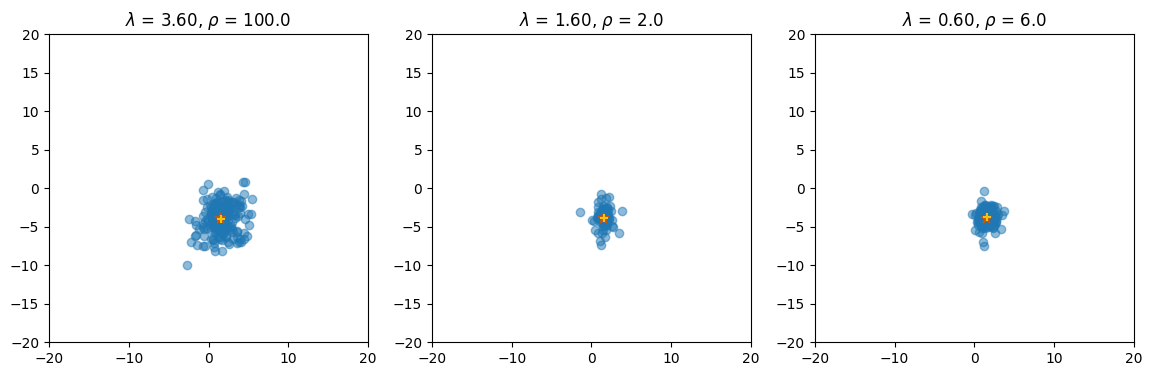

In [11]:
xlim = [-20, 20]
ylim = [-20, 20]

plt.set_cmap('tab20')
fig, axs = plt.subplots(1, 3, figsize=[14, 4])

for i, lam in enumerate(sorted(lam_to_beta.keys(), reverse=True)):
    beta = lam_to_beta[lam]
    rho = lam_to_rho[lam]
    beta_mean = beta.mean(axis=0)

    axs[i].scatter(
        beta[:, 0], 
        beta[:, 1], 
        alpha=0.5)
    axs[i].scatter(
        beta_nongrouped.betas[0][0],
        beta_nongrouped.betas[0][1],
        c='#D35400', # red
        s=60,
        marker="*",
    )
    axs[i].scatter(
        beta_mean[0], 
        beta_mean[1], 
        c='#F1C40F',  # yellow
        s=30,
        marker="+")
    
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_title(f"$\\lambda$ = {lam:0.2f}, $ \\rho$ = {rho}")
    
plt.savefig(f'results/mdp_homo_linear.pdf', bbox_inches='tight')
plt.show()